In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("obase_stock_market_historical_prices.csv")
df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,22.05.2023,"14,06","13,96","14,10","13,84","270,14K","1,08%"
1,18.05.2023,"13,91","14,48","14,55","13,90","456,16K","-3,74%"
2,17.05.2023,"14,45","14,16","14,47","14,00","691,75K","2,05%"
3,16.05.2023,"14,16","13,83","14,26","13,83","443,17K","2,39%"
4,15.05.2023,"13,83","13,10","14,29","13,08","220,45K","-0,50%"
...,...,...,...,...,...,...,...
195,10.08.2022,"18,57","18,00","18,57","17,83","13,50M","9,95%"
196,09.08.2022,"16,89","16,89","16,89","16,89","2,74M","9,96%"
197,08.08.2022,"15,36","15,36","15,36","15,36","1,09M","9,95%"
198,05.08.2022,"13,97","13,97","13,97","13,97","420,80K","10,00%"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   200 non-null    object
 1   Şimdi   200 non-null    object
 2   Açılış  200 non-null    object
 3   Yüksek  200 non-null    object
 4   Düşük   200 non-null    object
 5   Hac.    200 non-null    object
 6   Fark %  200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [5]:
df["Tarih"] = pd.to_datetime(df["Tarih"],dayfirst=True)
df

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2023-05-22,"14,06","13,96","14,10","13,84","270,14K","1,08%"
1,2023-05-18,"13,91","14,48","14,55","13,90","456,16K","-3,74%"
2,2023-05-17,"14,45","14,16","14,47","14,00","691,75K","2,05%"
3,2023-05-16,"14,16","13,83","14,26","13,83","443,17K","2,39%"
4,2023-05-15,"13,83","13,10","14,29","13,08","220,45K","-0,50%"
...,...,...,...,...,...,...,...
195,2022-08-10,"18,57","18,00","18,57","17,83","13,50M","9,95%"
196,2022-08-09,"16,89","16,89","16,89","16,89","2,74M","9,96%"
197,2022-08-08,"15,36","15,36","15,36","15,36","1,09M","9,95%"
198,2022-08-05,"13,97","13,97","13,97","13,97","420,80K","10,00%"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarih   200 non-null    datetime64[ns]
 1   Şimdi   200 non-null    object        
 2   Açılış  200 non-null    object        
 3   Yüksek  200 non-null    object        
 4   Düşük   200 non-null    object        
 5   Hac.    200 non-null    object        
 6   Fark %  200 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.1+ KB


In [7]:
df.set_index("Tarih",inplace=True)
df

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
Tarih,,,,,,
2023-05-22,"14,06","13,96","14,10","13,84","270,14K","1,08%"
2023-05-18,"13,91","14,48","14,55","13,90","456,16K","-3,74%"
2023-05-17,"14,45","14,16","14,47","14,00","691,75K","2,05%"
2023-05-16,"14,16","13,83","14,26","13,83","443,17K","2,39%"
2023-05-15,"13,83","13,10","14,29","13,08","220,45K","-0,50%"
...,...,...,...,...,...,...
2022-08-10,"18,57","18,00","18,57","17,83","13,50M","9,95%"
2022-08-09,"16,89","16,89","16,89","16,89","2,74M","9,96%"
2022-08-08,"15,36","15,36","15,36","15,36","1,09M","9,95%"


In [8]:
def pozitif_negatif(data,sütun_adı="Fark %"):
    data["Pozitif-Negatif"] = [float(i.replace("%","").replace(",",".")) for i in data[sütun_adı].values]
    data.drop(sütun_adı,axis=1,inplace=True)
    
    return data  

In [9]:
pozitif_negatif(data=df)

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,,
2023-05-22,"14,06","13,96","14,10","13,84","270,14K",1.08
2023-05-18,"13,91","14,48","14,55","13,90","456,16K",-3.74
2023-05-17,"14,45","14,16","14,47","14,00","691,75K",2.05
2023-05-16,"14,16","13,83","14,26","13,83","443,17K",2.39
2023-05-15,"13,83","13,10","14,29","13,08","220,45K",-0.50
...,...,...,...,...,...,...
2022-08-10,"18,57","18,00","18,57","17,83","13,50M",9.95
2022-08-09,"16,89","16,89","16,89","16,89","2,74M",9.96
2022-08-08,"15,36","15,36","15,36","15,36","1,09M",9.95


In [10]:
def convert_to_float(data):
    for i in range(4):
        data[data.columns[i]] = [float(j.replace(",",".")) for j in data[data.columns[i]].values]
    return data

In [11]:
convert_to_float(data=df)

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,,
2023-05-22,14.06,13.96,14.10,13.84,"270,14K",1.08
2023-05-18,13.91,14.48,14.55,13.90,"456,16K",-3.74
2023-05-17,14.45,14.16,14.47,14.00,"691,75K",2.05
2023-05-16,14.16,13.83,14.26,13.83,"443,17K",2.39
2023-05-15,13.83,13.10,14.29,13.08,"220,45K",-0.50
...,...,...,...,...,...,...
2022-08-10,18.57,18.00,18.57,17.83,"13,50M",9.95
2022-08-09,16.89,16.89,16.89,16.89,"2,74M",9.96
2022-08-08,15.36,15.36,15.36,15.36,"1,09M",9.95


In [12]:
def volume(data,column="Hac."):
    data[column] = [float(i.replace("M","").replace(",","."))*1000000 if "M" in i else float(i.replace("K","").replace(",","."))*1000 for i in data[column].values]

    return data

In [13]:
volume(data=df)

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,,
2023-05-22,14.06,13.96,14.10,13.84,270140.0,1.08
2023-05-18,13.91,14.48,14.55,13.90,456160.0,-3.74
2023-05-17,14.45,14.16,14.47,14.00,691750.0,2.05
2023-05-16,14.16,13.83,14.26,13.83,443170.0,2.39
2023-05-15,13.83,13.10,14.29,13.08,220450.0,-0.50
...,...,...,...,...,...,...
2022-08-10,18.57,18.00,18.57,17.83,13500000.0,9.95
2022-08-09,16.89,16.89,16.89,16.89,2740000.0,9.96
2022-08-08,15.36,15.36,15.36,15.36,1090000.0,9.95


In [14]:
train = df.loc[df.index < "2023-03-31"]
train

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,,
2023-03-30,16.73,16.40,17.42,16.24,1950000.0,2.26
2023-03-29,16.36,16.40,16.65,16.00,416750.0,-0.24
2023-03-28,16.40,17.35,17.36,16.30,432820.0,-5.26
2023-03-27,17.31,16.91,17.43,16.89,517620.0,2.61
2023-03-24,16.87,16.89,17.14,16.75,292180.0,-0.12
...,...,...,...,...,...,...
2022-08-10,18.57,18.00,18.57,17.83,13500000.0,9.95
2022-08-09,16.89,16.89,16.89,16.89,2740000.0,9.96
2022-08-08,15.36,15.36,15.36,15.36,1090000.0,9.95


In [15]:
test = df.loc[df.index >= "2023-03-31"]
test

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,,
2023-05-22,14.06,13.96,14.10,13.84,270140.0,1.08
2023-05-18,13.91,14.48,14.55,13.90,456160.0,-3.74
2023-05-17,14.45,14.16,14.47,14.00,691750.0,2.05
2023-05-16,14.16,13.83,14.26,13.83,443170.0,2.39
2023-05-15,13.83,13.10,14.29,13.08,220450.0,-0.50
2023-05-12,13.90,14.20,14.38,13.73,374540.0,-1.84
2023-05-11,14.16,13.85,14.81,13.68,438060.0,2.53
2023-05-10,13.81,14.47,14.53,13.77,398200.0,-4.56
2023-05-09,14.47,14.60,14.86,14.34,295290.0,-1.36


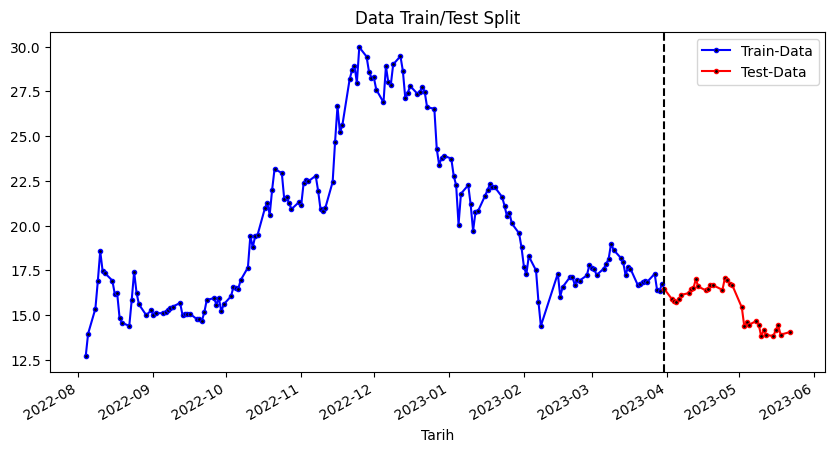

In [16]:
train["Şimdi"].plot(style="-",figsize=(10,5),color="blue",label="Train-Data",marker=".",mfc="black")
test["Şimdi"].plot(style="-",figsize=(10,5),color="red",label="Test-Data",marker=".",mfc="black")
plt.axvline("2023-03-31",ls="--",lw=1.5,color="black")
plt.title("Data Train/Test Split")
plt.legend()
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [18]:
x_train = train.drop(columns="Şimdi",axis=1)
y_train = train["Şimdi"]
x_test = test.drop(columns="Şimdi",axis=1)
y_test = test["Şimdi"]

In [19]:
x_train

,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,
2023-03-30,16.40,17.42,16.24,1950000.0,2.26
2023-03-29,16.40,16.65,16.00,416750.0,-0.24
2023-03-28,17.35,17.36,16.30,432820.0,-5.26
2023-03-27,16.91,17.43,16.89,517620.0,2.61
2023-03-24,16.89,17.14,16.75,292180.0,-0.12
...,...,...,...,...,...
2022-08-10,18.00,18.57,17.83,13500000.0,9.95
2022-08-09,16.89,16.89,16.89,2740000.0,9.96
2022-08-08,15.36,15.36,15.36,1090000.0,9.95


In [20]:
y_train

Tarih
2023-03-30    16.73
2023-03-29    16.36
2023-03-28    16.40
2023-03-27    17.31
2023-03-24    16.87
              ...  
2022-08-10    18.57
2022-08-09    16.89
2022-08-08    15.36
2022-08-05    13.97
2022-08-04    12.70
Name: Şimdi, Length: 166, dtype: float64

In [21]:
x_test

,Açılış,Yüksek,Düşük,Hac.,Pozitif-Negatif
Tarih,,,,,
2023-05-22,13.96,14.10,13.84,270140.0,1.08
2023-05-18,14.48,14.55,13.90,456160.0,-3.74
2023-05-17,14.16,14.47,14.00,691750.0,2.05
2023-05-16,13.83,14.26,13.83,443170.0,2.39
2023-05-15,13.10,14.29,13.08,220450.0,-0.50
2023-05-12,14.20,14.38,13.73,374540.0,-1.84
2023-05-11,13.85,14.81,13.68,438060.0,2.53
2023-05-10,14.47,14.53,13.77,398200.0,-4.56
2023-05-09,14.60,14.86,14.34,295290.0,-1.36


In [22]:
y_test

Tarih
2023-05-22    14.06
2023-05-18    13.91
2023-05-17    14.45
2023-05-16    14.16
2023-05-15    13.83
2023-05-12    13.90
2023-05-11    14.16
2023-05-10    13.81
2023-05-09    14.47
2023-05-08    14.67
2023-05-05    14.47
2023-05-04    14.60
2023-05-03    14.39
2023-05-02    15.43
2023-04-28    16.69
2023-04-27    16.75
2023-04-26    16.97
2023-04-25    17.07
2023-04-24    16.41
2023-04-20    16.68
2023-04-19    16.69
2023-04-18    16.45
2023-04-17    16.39
2023-04-14    16.60
2023-04-13    17.00
2023-04-12    16.51
2023-04-11    16.47
2023-04-10    16.23
2023-04-07    16.13
2023-04-06    15.89
2023-04-05    15.76
2023-04-04    15.80
2023-04-03    15.92
2023-03-31    16.46
Name: Şimdi, dtype: float64

In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,sep="\n")

(166, 5)
(34, 5)
(166,)
(34,)


In [24]:
models = {"reg_model" : LinearRegression(),
         "randomforest_model" : RandomForestRegressor(),
        "dtr_model" :DecisionTreeRegressor(),
        "xgb_model":XGBRegressor()}

In [25]:
preds = list()

for key ,value in models.items():
    model = value
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    preds.append([model,prediction])
    
preds

[[LinearRegression(),
  array([13.98789267, 13.8819995 , 14.33169302, 14.15936684, 13.5733854 ,
         13.86484171, 14.39792819, 13.75357412, 14.42356884, 14.53758228,
         14.38785453, 14.78995382, 14.17849218, 15.44502545, 16.58571869,
         16.69682393, 16.78051078, 17.02789907, 16.31651563, 16.58171643,
         16.56274509, 16.46006283, 16.25935764, 16.58799578, 17.22887126,
         16.47611797, 16.34224433, 16.25516741, 16.09992031, 15.93790123,
         15.7548894 , 15.7690362 , 15.93614091, 16.36325795])],
 [RandomForestRegressor(),
  array([14.0743, 14.274 , 14.3486, 14.1002, 13.4779, 14.1505, 14.2322,
         14.2448, 14.4784, 14.5879, 14.4655, 14.8493, 14.6109, 15.907 ,
         16.6174, 16.8396, 16.8812, 16.8568, 16.4978, 16.7254, 16.5662,
         16.5092, 16.4276, 16.7666, 16.9163, 16.5419, 16.2653, 16.3641,
         15.8683, 15.7972, 15.7589, 15.7886, 16.0719, 16.5527])],
 [DecisionTreeRegressor(),
  array([12.7 , 12.7 , 12.7 , 12.7 , 12.7 , 12.7 , 12.7 , 12.7

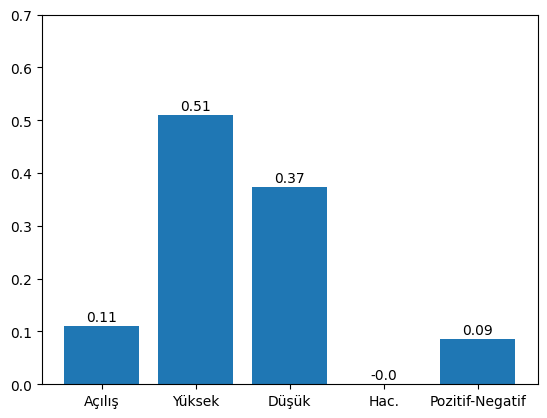

In [26]:
linear_model = preds[0][0]
plt.bar(x=linear_model.feature_names_in_, height=linear_model.coef_)
plt.ylim(top=0.7)

for i,j in zip(linear_model.feature_names_in_, linear_model.coef_):
    plt.text(x=i,
             y=j+0.01,
             s=round(j,ndigits=2),
             ha="center")
plt.show()

In [27]:
new_data = pd.DataFrame({"y_true":y_test,
                         "LinearRegression":preds[0][1],
                         "RandomForestRegressor":preds[1][1],
                         "DecisionTreeRegressor":preds[2][1],
                         "XGBRegressor":preds[3][1]})
new_data

,y_true,LinearRegression,RandomForestRegressor,DecisionTreeRegressor,XGBRegressor
Tarih,,,,,
2023-05-22,14.06,13.987893,14.0743,12.70,13.989704
2023-05-18,13.91,13.882000,14.2740,12.70,14.510125
2023-05-17,14.45,14.331693,14.3486,12.70,13.976827
2023-05-16,14.16,14.159367,14.1002,12.70,14.109241
2023-05-15,13.83,13.573385,13.4779,12.70,12.828186
2023-05-12,13.90,13.864842,14.1505,12.70,14.572846
2023-05-11,14.16,14.397928,14.2322,12.70,14.166955
2023-05-10,13.81,13.753574,14.2448,12.70,14.602101
2023-05-09,14.47,14.423569,14.4784,14.40,14.612985


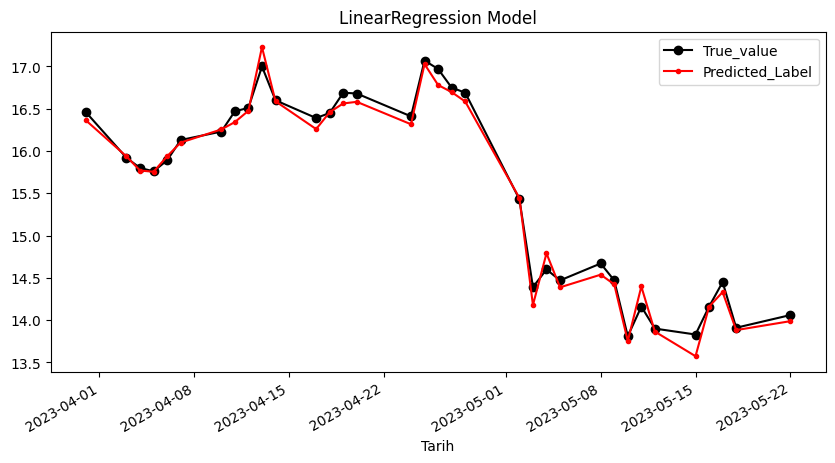

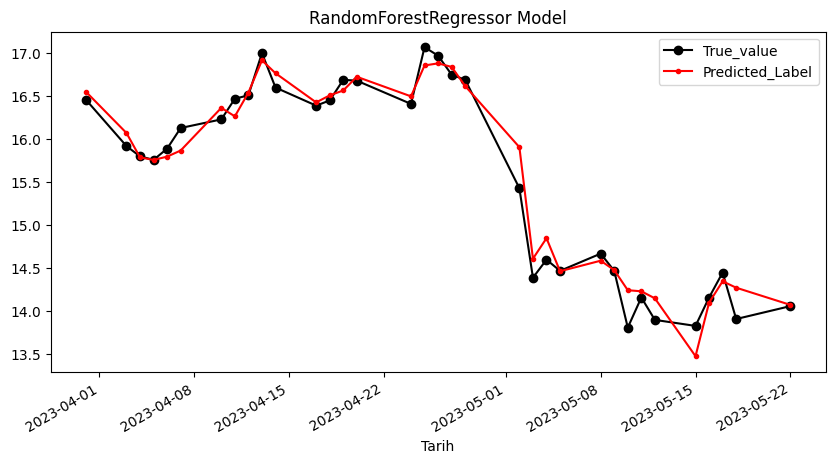

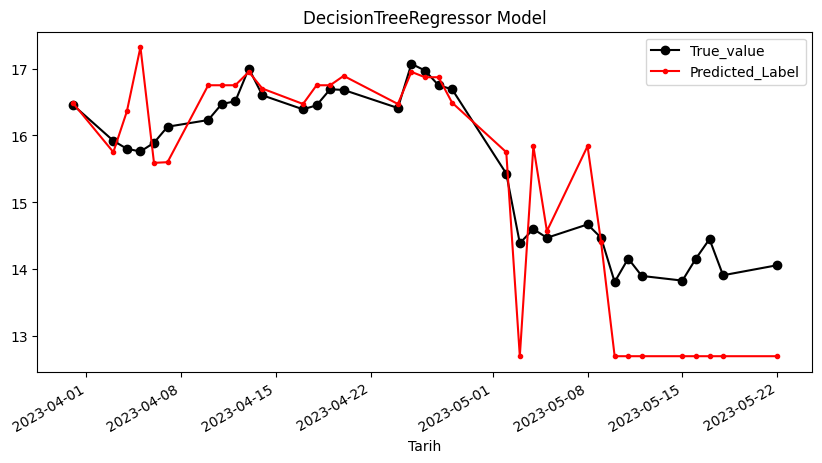

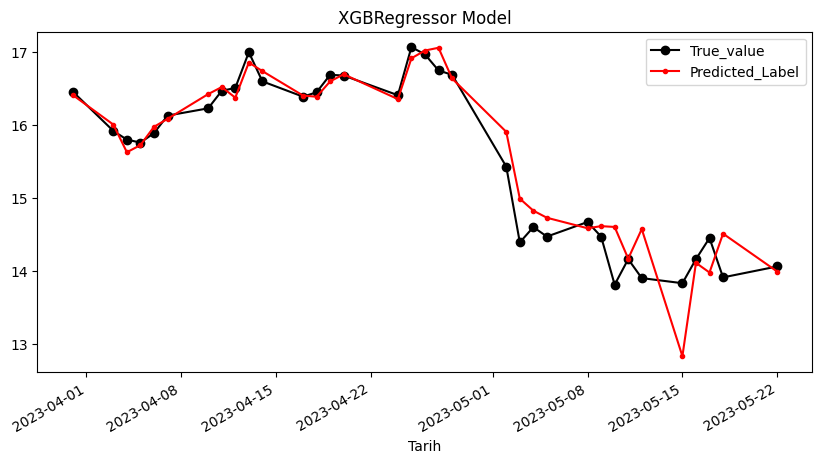

In [28]:
plt.figure(figsize=(10,5))
new_data["y_true"].plot(marker="o",label="True_value",color="black")
new_data["LinearRegression"].plot(marker=".",label="Predicted_Label",color="red")
plt.title("LinearRegression Model")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
new_data["y_true"].plot(marker="o",label="True_value",color="black")
new_data["RandomForestRegressor"].plot(marker=".",label="Predicted_Label",color="red")
plt.title("RandomForestRegressor Model")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
new_data["y_true"].plot(marker="o",label="True_value",color="black")
new_data["DecisionTreeRegressor"].plot(marker=".",label="Predicted_Label",color="red")
plt.title("DecisionTreeRegressor Model")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
new_data["y_true"].plot(marker="o",label="True_value",color="black")
new_data["XGBRegressor"].plot(marker=".",label="Predicted_Label",color="red")
plt.title("XGBRegressor Model")
plt.legend()
plt.show()

In [29]:
pickle.dump(linear_model,open("trained_model.pkl","wb"))